# Part 2: Fertilizer Prediction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

Loading dataset

In [ ]:
fert_data = pd.read_csv(r'/content/drive/MyDrive/Fertilizer_Prediction.csv')
fert_data

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


In [ ]:
fert_data['Soil Type'].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [ ]:
fert_data['Crop Type'].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [ ]:
fert_data['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

One-hot Encoding categories

In [ ]:
categories=fert_data[['Soil Type','Crop Type']]

final_fert=fert_data.drop(['Soil Type','Crop Type'],axis=1)

#one-hot encoding
encoded_soil=pd.get_dummies(categories['Soil Type'])
encoded_crop=pd.get_dummies(categories['Crop Type'])
final_fert=final_fert.join(encoded_soil)
final_fert=final_fert.join(encoded_crop)
final_fert

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Black,Clayey,Loamy,Red,Sandy,Barley,Cotton,Ground Nuts,Maize,Millets,Oil seeds,Paddy,Pulses,Sugarcane,Tobacco,Wheat
0,26,52,38,37,0,0,Urea,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,29,52,45,12,0,36,DAP,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,34,65,62,7,9,30,14-35-14,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,32,62,34,22,0,20,28-28,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,28,54,46,35,0,0,Urea,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,25,50,32,24,0,19,28-28,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
95,30,60,27,4,17,17,10-26-26,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
96,38,72,51,39,0,0,Urea,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
97,36,60,43,15,0,41,DAP,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
X = final_fert.drop(columns=['Fertilizer Name'])
y = final_fert['Fertilizer Name']

Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size=0.6)

GradientBoosting

In [ ]:
GB = GradientBoostingClassifier(random_state = 0)
GB.fit(X_train, y_train)
print('Accuracy of GB classifier on training set: ',(GB.score(X_train, y_train)))
print('Accuracy of GB classifier on test set:', (GB.score(X_test, y_test)))

Accuracy of GB classifier on training set:  1.0
Accuracy of GB classifier on test set: 0.9333333333333333


              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         5
    14-35-14       1.00      0.62      0.77         8
    17-17-17       1.00      0.80      0.89         5
       20-20       1.00      1.00      1.00         6
       28-28       1.00      1.00      1.00        12
         DAP       0.67      1.00      0.80         8
        Urea       1.00      1.00      1.00        16

    accuracy                           0.93        60
   macro avg       0.95      0.92      0.92        60
weighted avg       0.96      0.93      0.93        60



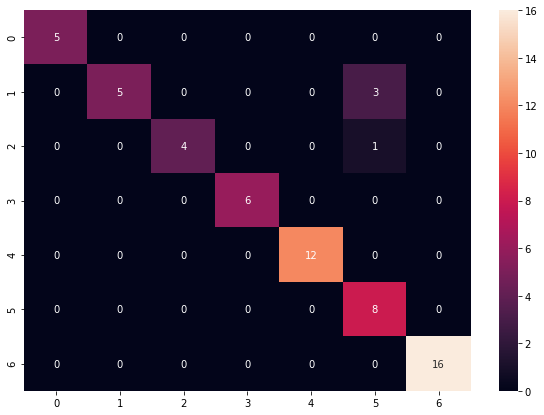

In [ ]:
predicted = GB.predict(X_test)
print(classification_report(y_test,predicted))
plt.subplots(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,predicted), annot = True)

DecisionTree


In [ ]:
DT = DecisionTreeClassifier(random_state = 0)
DT.fit(X_train, y_train)
print('Accuracy of GB classifier on training set: ',(DT.score(X_train, y_train)))
print('Accuracy of GB classifier on test set:', (DT.score(X_test, y_test)))

Accuracy of GB classifier on training set:  1.0
Accuracy of GB classifier on test set: 0.9166666666666666


              precision    recall  f1-score   support

    10-26-26       0.50      0.40      0.44         5
    14-35-14       1.00      0.75      0.86         8
    17-17-17       0.62      1.00      0.77         5
       20-20       1.00      1.00      1.00         6
       28-28       1.00      1.00      1.00        12
         DAP       1.00      1.00      1.00         8
        Urea       1.00      1.00      1.00        16

    accuracy                           0.92        60
   macro avg       0.88      0.88      0.87        60
weighted avg       0.93      0.92      0.92        60



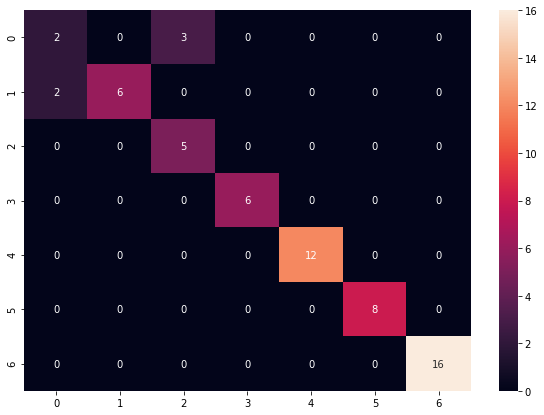

In [ ]:
predicted = DT.predict(X_test)
print(classification_report(y_test,predicted))
plt.subplots(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,predicted), annot = True)

MLP (test_acc:1.0)

In [ ]:
MLP = MLPClassifier(hidden_layer_sizes = [100, 100], alpha = 1.0,
                    random_state = 0, solver='lbfgs', max_iter=5000).fit(X_train, y_train)
print('Accuracy of MLP on training set: ',(MLP.score(X_train, y_train)))
print('Accuracy of MLP on test set:', (MLP.score(X_test, y_test)))

Accuracy of MLP on training set:  1.0
Accuracy of MLP on test set: 1.0


              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         5
    14-35-14       1.00      1.00      1.00         8
    17-17-17       1.00      1.00      1.00         5
       20-20       1.00      1.00      1.00         6
       28-28       1.00      1.00      1.00        12
         DAP       1.00      1.00      1.00         8
        Urea       1.00      1.00      1.00        16

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



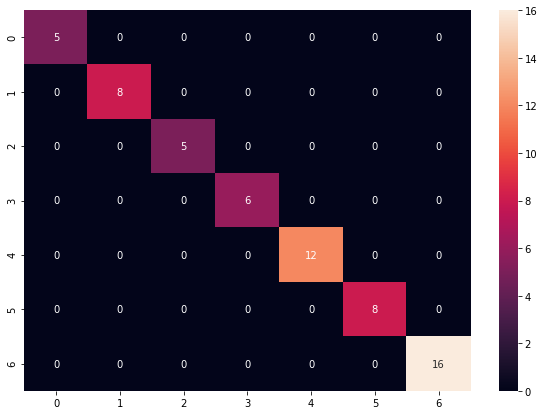

In [ ]:
predicted = MLP.predict(X_test)
print(classification_report(y_test,predicted))
plt.subplots(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,predicted), annot = True)

MLP2 (test_acc:0.983)

In [ ]:
MLP2 = MLPClassifier(hidden_layer_sizes = [100, 50], alpha = 2.0,
                    random_state = 0, solver='lbfgs', max_iter=5000).fit(X_train, y_train)
print('Accuracy of MLP on training set: ',(MLP2.score(X_train, y_train)))
print('Accuracy of MLP on test set:', (MLP2.score(X_test, y_test)))

Accuracy of MLP on training set:  1.0
Accuracy of MLP on test set: 0.9833333333333333


              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         5
    14-35-14       1.00      1.00      1.00         8
    17-17-17       1.00      0.80      0.89         5
       20-20       0.86      1.00      0.92         6
       28-28       1.00      1.00      1.00        12
         DAP       1.00      1.00      1.00         8
        Urea       1.00      1.00      1.00        16

    accuracy                           0.98        60
   macro avg       0.98      0.97      0.97        60
weighted avg       0.99      0.98      0.98        60



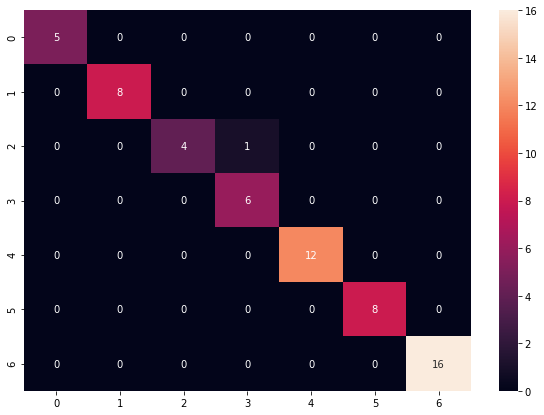

In [ ]:
predicted = MLP2.predict(X_test)
print(classification_report(y_test,predicted))
plt.subplots(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,predicted), annot = True)

Saving Models

In [ ]:
import joblib
filename = 'DT_Fert.sav'
joblib.dump(DT, filename)
filename = 'GB_Fert.sav'
joblib.dump(GB, filename)
filename = 'MLP_Fert.sav'
joblib.dump(MLP, filename)
filename = 'MLP2_Fert.sav'
joblib.dump(MLP2, filename)

['MLP2_Fert.sav']

Loading saved model

In [ ]:
import joblib
filename = 'MLP_Fert.sav'
joblib.dump(MLP, filename)

['MLP_Fert.sav']

In [ ]:
loaded_model=joblib.load(filename)

Front End Code snippet

In [ ]:
# Temparature	Humidity	Moisture	Nitrogen	Potassium	Phosphorous Soil Type	Crop Type

import joblib
loaded_model=joblib.load('MLP_Fert.sav')

soil_dict={"black":0,"clayey":1,"loamy":2,"red":3,"sandy":4}
crop_dict={"barley":0,"cotton":1,"ground nuts":2,"maize":3,"millets":4,"oil seeds":5,"paddy":6,"pulses":7,"sugarcane":8,"tobacco":9,"wheat":10}

temperature = float(input("Enter the avg temperature at your location: "))
humidity = float(input("Enter the Humidity level at your location: "))
moisture = float(input("Enter the moisture level of soil: "))
n = float(input("Enter the Nitrogen level in crop: "))
k = float(input("Enter the Pottasium level in crop: "))
p = float(input("Enter the Phosphorus level in crop: "))
soil = input("Enter the soil type of your farm: ")
crop = input("Enter the crop you want to grow: ")

s1=[0]*len(soil_dict)
t1=[0]*len(crop_dict)
s1[soil_dict[soil.lower()]]=1
t1[crop_dict[crop.lower()]]=1
test=[[temperature,humidity,moisture,n,k,p] + s1 + t1]
result=loaded_model.predict(test)
print("You should use ",result[0]," fertilizer for your crop")

Enter the avg temperature at your location: 25
Enter the Humidity level at your location: 53
Enter the moisture level of soil: 36
Enter the Nitrogen level in crop: 36
Enter the Pottasium level in crop: 0
Enter the Phosphorus level in crop: 0
Enter the soil type of your farm: Sandy
Enter the crop you want to grow: Maize
You should use  Urea  for your crop
